In [231]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,adjusted_mutual_info_score,completeness_score,homogeneity_score

from yellowbrick.cluster import KElbowVisualizer

In [232]:
uber=pd.read_csv(r"C:\Users\Vithushan\Project 8\project 8 raw data\uber-tlc-foil-response\uber-trip-data\uber-raw-data-aug14.csv")

In [233]:
uber

Date/Time      Lat      Lon    Base
0         8/1/2014 0:03:00  40.7366 -73.9906  B02512
1         8/1/2014 0:09:00  40.7260 -73.9918  B02512
2         8/1/2014 0:12:00  40.7209 -74.0507  B02512
3         8/1/2014 0:12:00  40.7387 -73.9856  B02512
4         8/1/2014 0:12:00  40.7323 -74.0077  B02512
...                    ...      ...      ...     ...
829270  8/31/2014 23:55:00  40.7552 -73.9753  B02764
829271  8/31/2014 23:55:00  40.7552 -73.9753  B02764
829272  8/31/2014 23:55:00  40.7617 -73.9788  B02764
829273  8/31/2014 23:59:00  40.7395 -73.9889  B02764
829274  8/31/2014 23:59:00  40.7270 -73.9802  B02764

[829275 rows x 4 columns]

In [234]:
uber.shape

(829275, 4)

In [235]:
uber.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [236]:
uber.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [237]:
uber["Base"].value_counts()

B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64

In [238]:
uber["Date/Time"]=pd.to_datetime(uber["Date/Time"])

In [239]:
uber["Date"]=pd.to_datetime(uber["Date/Time"]).dt.date

In [240]:
uber["Time"]=pd.to_datetime(uber["Date/Time"]).dt.time


In [241]:
uber['hour'] =uber['Date/Time'].dt.hour


In [242]:
uber['Day_Of_Week'] = pd.DatetimeIndex(uber['Date/Time']).day_name()
uber

Date/Time      Lat      Lon    Base        Date      Time  \
0      2014-08-01 00:03:00  40.7366 -73.9906  B02512  2014-08-01  00:03:00   
1      2014-08-01 00:09:00  40.7260 -73.9918  B02512  2014-08-01  00:09:00   
2      2014-08-01 00:12:00  40.7209 -74.0507  B02512  2014-08-01  00:12:00   
3      2014-08-01 00:12:00  40.7387 -73.9856  B02512  2014-08-01  00:12:00   
4      2014-08-01 00:12:00  40.7323 -74.0077  B02512  2014-08-01  00:12:00   
...                    ...      ...      ...     ...         ...       ...   
829270 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31  23:55:00   
829271 2014-08-31 23:55:00  40.7552 -73.9753  B02764  2014-08-31  23:55:00   
829272 2014-08-31 23:55:00  40.7617 -73.9788  B02764  2014-08-31  23:55:00   
829273 2014-08-31 23:59:00  40.7395 -73.9889  B02764  2014-08-31  23:59:00   
829274 2014-08-31 23:59:00  40.7270 -73.9802  B02764  2014-08-31  23:59:00   

        hour Day_Of_Week  
0          0      Friday  
1          0      Friday  
2          0      Friday  
3          0      Friday  
4          0      Friday  
...      ...         ...  
829270    23      Sunday  
829271    23      Sunday  
829272    23      Sunday  
829273    23      Sunday  
829274    23      Sunday  

[829275 rows x 8 columns]

In [243]:
uber.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date', 'Time', 'hour',
       'Day_Of_Week'],
      dtype='object')

In [244]:
uber1=uber[['Date', 'Time','hour','Lat', 'Lon', 'Base','Day_Of_Week']]
uber1

Date      Time  hour      Lat      Lon    Base Day_Of_Week
0       2014-08-01  00:03:00     0  40.7366 -73.9906  B02512      Friday
1       2014-08-01  00:09:00     0  40.7260 -73.9918  B02512      Friday
2       2014-08-01  00:12:00     0  40.7209 -74.0507  B02512      Friday
3       2014-08-01  00:12:00     0  40.7387 -73.9856  B02512      Friday
4       2014-08-01  00:12:00     0  40.7323 -74.0077  B02512      Friday
...            ...       ...   ...      ...      ...     ...         ...
829270  2014-08-31  23:55:00    23  40.7552 -73.9753  B02764      Sunday
829271  2014-08-31  23:55:00    23  40.7552 -73.9753  B02764      Sunday
829272  2014-08-31  23:55:00    23  40.7617 -73.9788  B02764      Sunday
829273  2014-08-31  23:59:00    23  40.7395 -73.9889  B02764      Sunday
829274  2014-08-31  23:59:00    23  40.7270 -73.9802  B02764      Sunday

[829275 rows x 7 columns]

In [245]:
uber_sample = uber1.sample(frac=0.01, random_state=1)
uber_sample

Date      Time  hour      Lat      Lon    Base Day_Of_Week
64470   2014-08-05  11:48:00    11  40.7036 -73.9907  B02598     Tuesday
304953  2014-08-05  14:34:00    14  40.7493 -73.9758  B02617     Tuesday
806937  2014-08-23  20:58:00    20  40.6953 -74.1775  B02764    Saturday
745410  2014-08-25  01:44:00     1  40.7549 -73.9846  B02682      Monday
274496  2014-08-02  19:45:00    19  40.7650 -73.9208  B02617    Saturday
...            ...       ...   ...      ...      ...     ...         ...
303292  2014-08-05  11:22:00    11  40.7429 -73.9742  B02617     Tuesday
25029   2014-08-24  14:03:00    14  40.7358 -73.9948  B02512      Sunday
37975   2014-08-01  19:06:00    19  40.7412 -73.9998  B02598      Friday
240911  2014-08-30  04:32:00     4  40.7954 -73.9636  B02598    Saturday
520590  2014-08-23  16:43:00    16  40.6372 -73.9600  B02617    Saturday

[8293 rows x 7 columns]

In [246]:
uber_sample.shape

(8293, 7)

In [247]:
data_model=uber_sample[["Lat","Lon"]]
data_model

Lat      Lon
64470   40.7036 -73.9907
304953  40.7493 -73.9758
806937  40.6953 -74.1775
745410  40.7549 -73.9846
274496  40.7650 -73.9208
...         ...      ...
303292  40.7429 -73.9742
25029   40.7358 -73.9948
37975   40.7412 -73.9998
240911  40.7954 -73.9636
520590  40.6372 -73.9600

[8293 rows x 2 columns]

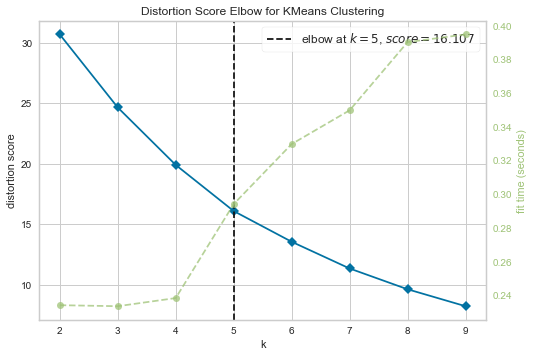

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [248]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(data_model)
visualizer.poof()

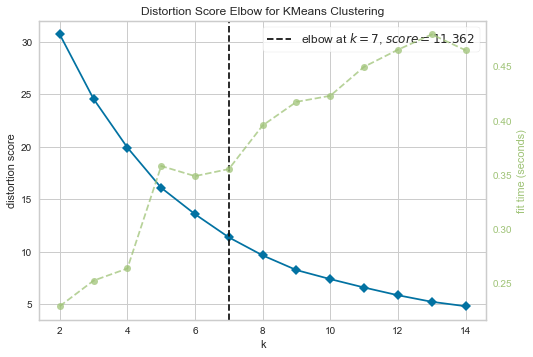

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [250]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,15))
visualizer.fit(data_model)
visualizer.poof()

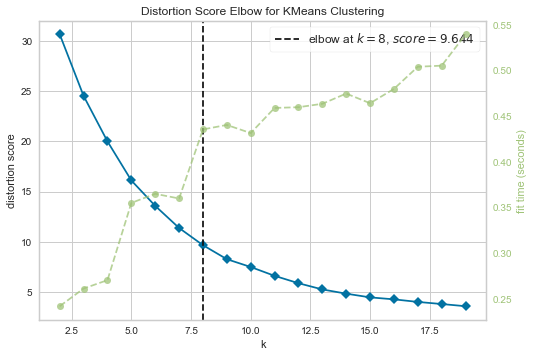

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [251]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,20))
visualizer.fit(data_model)
visualizer.poof()

In [252]:
x=uber_sample[["Lat"]]
y=uber_sample[["Lon"]]

In [253]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_model)
kmeans.predict(data_model)
data_model["KM_Label"]=kmeans.labels_

C:\Users\Vithushan\AppData\Local\Temp\ipykernel_4320\3338397480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model["KM_Label"]=kmeans.labels_


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

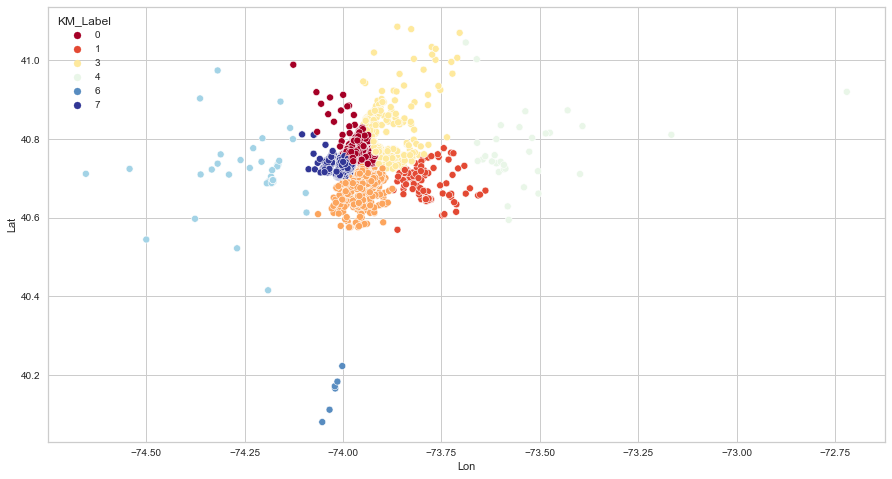

In [254]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data_model, x='Lon',y='Lat',hue=data_model["KM_Label"],palette='RdYlBu')

In [255]:
DB=DBSCAN(min_samples=5)
DB.fit(data_model)

data_model['DB_label']=DB.labels_

C:\Users\Vithushan\AppData\Local\Temp\ipykernel_4320\1834783381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['DB_label']=DB.labels_


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

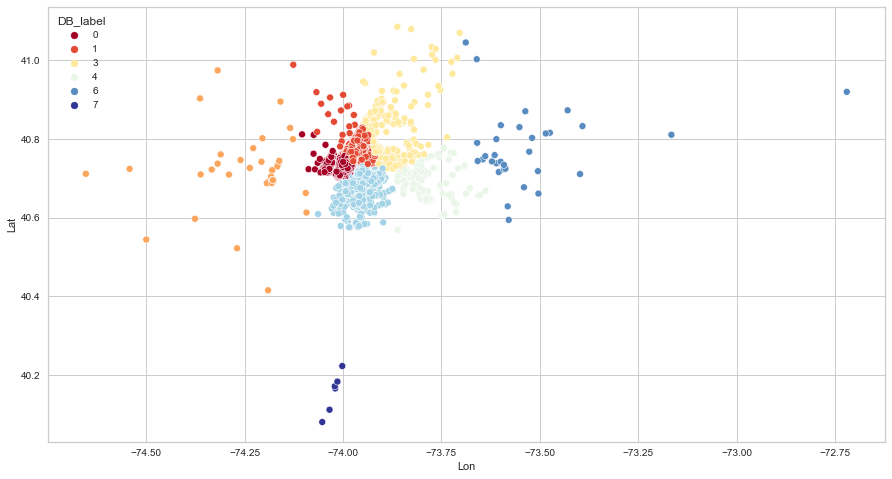

In [256]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data_model, x='Lon',y='Lat',hue=data_model["DB_label"],palette='RdYlBu')

In [257]:
silhouette_score_kmeans =silhouette_score(data_model, labels=data_model["KM_Label"])
silhouette_score_kmeans

0.9854698960284993

In [258]:
calinski_harabasz_score_kmeans=calinski_harabasz_score(data_model, labels=data_model["KM_Label"])
calinski_harabasz_score_kmeans

13162086.818397269

In [259]:
davies_bouldin_score_kmeans=davies_bouldin_score(data_model,labels=data_model["KM_Label"])
davies_bouldin_score_kmeans

0.055664811830055574

In [156]:
af = AffinityPropagation(max_iter=20, random_state=0).fit(data_model)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

C:\Users\Vithushan\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [157]:
labels

array([   0,    1, 2529, ..., 7716, 7717, 7718], dtype=int64)

In [158]:
centers = kmeans.cluster_centers_

In [159]:
centers

array([[ 40.68902194, -73.96197292],
       [ 40.76671587, -73.97160404],
       [ 40.76984516, -73.52284194],
       [ 40.79807787, -73.87835234],
       [ 40.66054983, -73.78587612],
       [ 40.70185816, -74.20381429],
       [ 40.7314346 , -73.99766227],
       [ 40.15606667, -74.02405   ]])

In [160]:
cluster_ag = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
y_ag = cluster_ag.fit_predict(data_model)

In [161]:
data_model['ag_labels'] =cluster_ag.labels_

C:\Users\Vithushan\AppData\Local\Temp\ipykernel_4320\1748612184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['ag_labels'] =cluster_ag.labels_


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

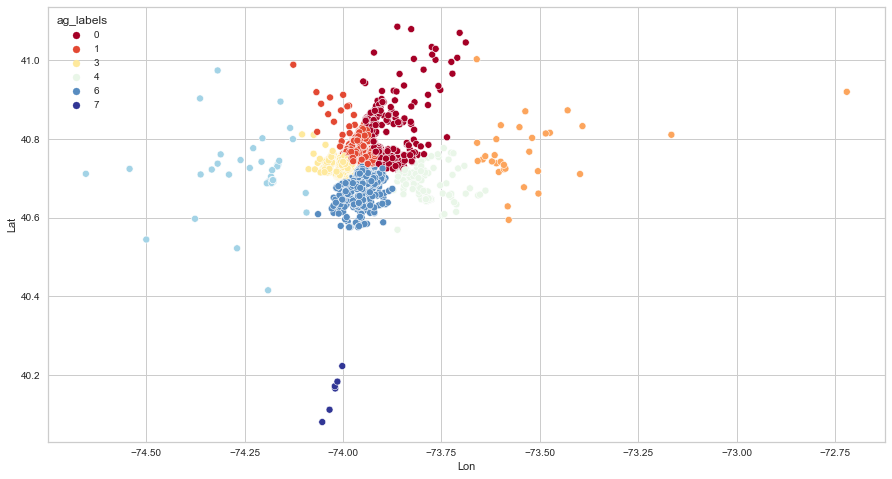

In [192]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data_model, x='Lon',y='Lat',hue=data_model['ag_labels'],palette='RdYlBu')

In [163]:
silhouette_score_agf =silhouette_score(data_model, labels=data_model['ag_labels'])
silhouette_score_agf

0.9898020239662372

In [164]:
calinski_harabasz_score_kmeans=calinski_harabasz_score(data_model, labels=data_model['ag_labels'])
calinski_harabasz_score_kmeans

13058827.076808687

In [165]:
davies_bouldin_score_kmeans=davies_bouldin_score(data_model,labels=data_model['ag_labels'])
davies_bouldin_score_kmeans

0.038294453980675484

In [166]:
data_model

Lat      Lon  KM_Label  DB_label  ag_labels
64470   40.7036 -73.9907         6         0          3
304953  40.7493 -73.9758         1         1          1
806937  40.6953 -74.1775         5         2          5
745410  40.7549 -73.9846         1         1          1
274496  40.7650 -73.9208         1         1          1
...         ...      ...       ...       ...        ...
303292  40.7429 -73.9742         1         1          1
25029   40.7358 -73.9948         6         0          3
37975   40.7412 -73.9998         6         0          3
240911  40.7954 -73.9636         1         1          1
520590  40.6372 -73.9600         0         5          6

[8293 rows x 5 columns]

In [167]:
import folium

In [168]:
#map = folium.Map(location=[data_model.Lat.mean(), data_model.Lon.mean()], zoom_start=10, control_scale=True)

In [169]:
#for index, location_info in data_model.iterrows():
    #folium.Marker([location_info["Lat"], location_info["Lon"]], popup=location_info["KM_Label"]).add_to(map)

In [229]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=7)
map_df=data_model.copy()
#map_df=map_df.sample(frac=0.1replace=True, random_state=1)
map_df=map_df.reset_index()
c={0:'green',1:'red',2:'orange',3:'blue',4:'crimson',5:'gray',6:'black',7:'pink'}
for i in range(0,map_df.shape[0],1):
    folium.Circle(location=[map_df.at[i,'Lat'],map_df.at[i,'Lon']],radius=1,color=c[map_df.at[i,"KM_Label"]]).add_to(m)


In [230]:
m

In [226]:
map_df

index      Lat      Lon  KM_Label  DB_label  ag_labels
0      64470  40.7036 -73.9907         6         0          3
1     304953  40.7493 -73.9758         1         1          1
2     806937  40.6953 -74.1775         5         2          5
3     745410  40.7549 -73.9846         1         1          1
4     274496  40.7650 -73.9208         1         1          1
...      ...      ...      ...       ...       ...        ...
8288  303292  40.7429 -73.9742         1         1          1
8289   25029  40.7358 -73.9948         6         0          3
8290   37975  40.7412 -73.9998         6         0          3
8291  240911  40.7954 -73.9636         1         1          1
8292  520590  40.6372 -73.9600         0         5          6

[8293 rows x 6 columns]

In [216]:
uber_sample

Date      Time  hour      Lat      Lon    Base Day_Of_Week
64470   2014-08-05  11:48:00    11  40.7036 -73.9907  B02598     Tuesday
304953  2014-08-05  14:34:00    14  40.7493 -73.9758  B02617     Tuesday
806937  2014-08-23  20:58:00    20  40.6953 -74.1775  B02764    Saturday
745410  2014-08-25  01:44:00     1  40.7549 -73.9846  B02682      Monday
274496  2014-08-02  19:45:00    19  40.7650 -73.9208  B02617    Saturday
...            ...       ...   ...      ...      ...     ...         ...
303292  2014-08-05  11:22:00    11  40.7429 -73.9742  B02617     Tuesday
25029   2014-08-24  14:03:00    14  40.7358 -73.9948  B02512      Sunday
37975   2014-08-01  19:06:00    19  40.7412 -73.9998  B02598      Friday
240911  2014-08-30  04:32:00     4  40.7954 -73.9636  B02598    Saturday
520590  2014-08-23  16:43:00    16  40.6372 -73.9600  B02617    Saturday

[8293 rows x 7 columns]

In [178]:
no_rides_weeks = uber_sample.groupby(['Day_Of_Week','hour'])['Base'].agg('count')
no_rides_weeks = pd.DataFrame(no_rides_weeks)
no_rides_weeks

Base
Day_Of_Week hour      
Friday      0       34
            1       22
            2       12
            3       21
            4       19
...                ...
Wednesday   19      74
            20      81
            21      71
            22      56
            23      36

[168 rows x 1 columns]

<AxesSubplot:xlabel='hour', ylabel='Base'>

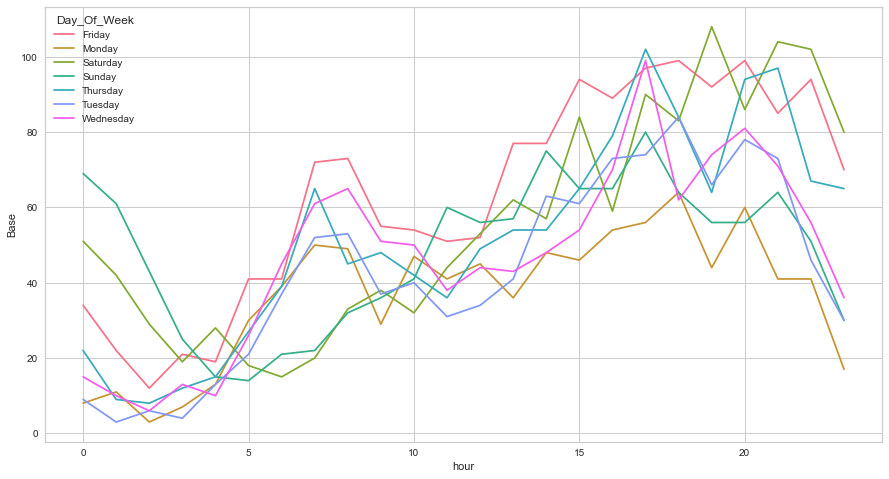

In [182]:
plt.figure(figsize=(15,8))
sns.lineplot(data=no_rides_weeks, x='hour', y='Base', hue='Day_Of_Week')

In [183]:
uber_sept=pd.read_csv(r"C:\Users\Vithushan\Project 8\project 8 raw data\uber-tlc-foil-response\uber-trip-data\uber-raw-data-sep14.csv")

In [184]:
uber_sept

Date/Time      Lat      Lon    Base
0          9/1/2014 0:01:00  40.2201 -74.0021  B02512
1          9/1/2014 0:01:00  40.7500 -74.0027  B02512
2          9/1/2014 0:03:00  40.7559 -73.9864  B02512
3          9/1/2014 0:06:00  40.7450 -73.9889  B02512
4          9/1/2014 0:11:00  40.8145 -73.9444  B02512
...                     ...      ...      ...     ...
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[1028136 rows x 4 columns]

In [ ]:
uber["Date/Time"]=pd.to_datetime(uber["Date/Time"])
uber["Date"]=pd.to_datetime(uber["Date/Time"]).dt.date